# Programación orientada a objetos

La idea básica en programación orientada a objetos es organizar los conceptos en **clases** o tipos de datos, cada uno de los cuales actuará como una unidad de información independiente. Estas clases se concretarán en uno o más **objetos**, instancias conretas del concepto representado pro la clase.

Con más detalle:

- Una clase define el conmportamiento de un nuevo concepto, mientras que un objeto es una variable concreta que representa a ese nuevo concreto.
- Las clases y los objetos combinan datos (llamados **atributos**) y funciones que actúan sobre ellos (llamadas funciones **miembro***).
- Las clases contienen funciones llamadas **constructores** que definen cómo debe ser creado un objeto particular.
- Una clase puede **heredar** su comportamiento a partir de otra clase diferente y añadir o modificar sobre esta última aquello que necesite.

Algunos conceptos usuales en orientación a objetos:

- **Encapsulamiento**: Los objetos contienen o encapsulan datos
- **Herencia**: Relación de jerarquía entre conceptos, según la cual una clase se deriva de (o extiende a) otra
- **Polimorfismo**: Cada modelo, quizás derivado de otro, puede personalizar su comportamiento

## Un ejemplo en Python: la clase "Tortuga"

El lenguaje de programación [Logo](https://es.wikipedia.org/wiki/Logo_(lenguaje_de_programaci%C3%B3n)) fue diseñado con fines didácticos y una de sus principales características es la posibilidad de producir [gráficas de tortuga](https://es.wikipedia.org/wiki/Gr%C3%A1ficas_tortuga).

Según Wikipedia: *Gráfica tortuga* es un término usado en computación gráfica como método para programar gráficos vectoriales usando un cursor relativo (la «tortuga») a unas coordenadas cartesianas. La tortuga tiene tres atributos:

- Una posición
- Una orientación
- Una pluma, teniendo atributos como color, ancho y un indicador de pluma arriba y abajo.

La tortuga se mueve con comandos relativos a su posición, como «avanza 10 » y «gira a la izquierda 90». Los valores «10» o «90» representan magnitudes diferentes, las cuales se verifican en la práctica.

Vamos a concretar este concepto en una clase, en principio vacía:

In [1]:
class Tortuga(object):
    """Clase que define el concepto de *cursor relativo* utilizado en gráficas de tortuga"""
    pass

Podemos crear un objeto de tipo ``Tortuga`` de la siguiente forma.

In [2]:
casiopea = Tortuga()  # Casiopea era el nombre de la tortuga de Momo
help(casiopea)

Help on Tortuga in module __main__ object:

class Tortuga(builtins.object)
 |  Clase que define el concepto de *cursor relativo* utilizado en gráficas de tortuga
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



En la actualidad, la clase tortuga no presenta ninguna funcionalidad. Pero en Python podemos asignar atributos a los objetos

In [3]:
casiopea.posicion = [0,0] # Situamos a esta tortuga en el origen (suponemos 2D)
casiopea.orientacion = [0,1] # La tortuga mira hacia arriba
casiopea.pluma_abajo = True # Tiene la pluma sobre el papel
help(casiopea)

Help on Tortuga in module __main__ object:

class Tortuga(builtins.object)
 |  Clase que define el concepto de *cursor relativo* utilizado en gráficas de tortuga
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Nos gustaría que todas las tortugas que construyamos tuvieran estos atributos. Para ello, podemos redefinir la clase Tortuga, dotándola de un constructor. En Python los constructores se definen a través de una función miembro llamada ``__init__`` (con doble guión bajo a izquierda y derecha).

Vamos a añadir un nuevo atributo a la tortuga: un color (que luego asociaremos al color de pluma)

In [4]:
class Tortuga(object):
    """Clase que define el concepto de *cursor relativo* utilizado en gráficas de tortuga"""
    
    def __init__(self, posicion=[0,0], orientacion=[1,0], color="Negro"):
        """Constructor: inicializa una tortuga"""
        self.posicion = posicion # Situamos a esta tortuga en el origen (suponemos 2D)
        self.orientacion = orientacion # La tortuga mira hacia arriba
        self.pluma_abajo = True # Tiene la pluma sobre el papel
        self.color = color
        
    def info(self):
        """Imprime información sobre la tortuga"""
        print("Posición:    " + str(self.posicion))
        print("Orientación: " + str(self.orientacion))
        print("Color:       " + str(self.color))
        print("Pluma abajo: " + str(self.pluma_abajo))
        
    def __str__(self):
        """
        Devuelve una representación de tipo string del objeto. 
        Es usada en particular por las funciones print() y chr()
        """
        s = "P=%s, V=%s, C=%s, p=%s" % (self.posicion, self.orientacion, self.color, self.pluma_abajo)
        return s

In [5]:
casiopea = Tortuga()
casiopea.info()
print("-----")
print("Casiopea:", casiopea)

Posición:    [0, 0]
Orientación: [1, 0]
Color:       Negro
Pluma abajo: True
-----
Casiopea: P=[0, 0], V=[1, 0], C=Negro, p=True


Los objetos que definimos pueden aprovechar todas las características de Python. Por ejemplo, podríamos hacer una lista comprehensiva de tortugas:

In [6]:
lista_tortugas = [ Tortuga(color=c) for c in ("Azul", "Rojo", "Naranja", "Violeta") ]
print(lista_tortugas[0])

P=[0, 0], V=[1, 0], C=Azul, p=True


O un diccionario de Tortugas Ninja ;-)

In [7]:
tortugas_ninja = { 
    "Leonardo": Tortuga(color="Azul"),
    "Rafael" : Tortuga(color="Rojo"),
    "Michelangelo" : Tortuga(color="Naranja"),
    "Donatello" : Tortuga(color="Violeta")
}
for nombre in tortugas_ninja.keys():
    print(nombre + "...\t" + str(tortugas_ninja[nombre]))

Leonardo...	P=[0, 0], V=[1, 0], C=Azul, p=True
Rafael...	P=[0, 0], V=[1, 0], C=Rojo, p=True
Michelangelo...	P=[0, 0], V=[1, 0], C=Naranja, p=True
Donatello...	P=[0, 0], V=[1, 0], C=Violeta, p=True


## Moviendo la tortuga en el plano

En la siguiente versión añadimos métodos para mover y girar la tortuga. 

In [8]:
from numpy import array, sin, cos, pi, dot

class Tortuga(object):
    """Clase que define el concepto de *cursor relativo* utilizado en gráficas de tortuga"""
    
    def __init__(self, posicion=[0,0], orientacion=[1,0], color="Negro"):
        """Constructor: inicializa una tortuga"""
        self.posicion = array(posicion, dtype='float64') # array de coma flotante
        self.orientacion = array(orientacion, dtype='float64')
        self.pluma_abajo = True 
        self.color = color
        
    def info(self):
        """Imprime información sobre la tortuga"""
        print("Posición:    " + str(self.posicion))
        print("Orientación: " + str(self.orientacion))
        print("Color:       " + str(self.color))
        print("Pluma abajo: " + str(self.pluma_abajo))

    def __str__(self):
        """
        Devuelve una representación de tipo string del objeto. 
        Es usada en particular por las funciones print() y chr()
        """
        s = "P=%s, V=%s, C=%s, p=%s" % (self.posicion, self.orientacion, self.color, self.pluma_abajo)
        return s
    
    def avanza(self, d):
        """Avanza una distancia d"""
        self.posicion += d*self.orientacion
        
    def izquierda(self, a):
        """Gira un águlo a (en radianes) en sentido positivo"""
        R = array( [[cos(a), -sin(a)],
                    [sin(a),  cos(a)] ])
        self.orientacion = dot(R, self.orientacion)

    def derecha(self, a):
        """Gira un águlo a (en radianes) en sentido negativo"""
        R = array( [[ cos(a), sin(a)],
                    [-sin(a), cos(a)] ])
        self.orientacion = dot(R, self.orientacion)


In [9]:
casiopea = Tortuga()
print(casiopea)

casiopea.avanza(5)
print(casiopea)

casiopea.izquierda(pi/2)
print(casiopea)

casiopea.derecha(pi/2)
print(casiopea)

P=[ 0.  0.], V=[ 1.  0.], C=Negro, p=True
P=[ 5.  0.], V=[ 1.  0.], C=Negro, p=True
P=[ 5.  0.], V=[  6.12323400e-17   1.00000000e+00], C=Negro, p=True
P=[ 5.  0.], V=[ 1.  0.], C=Negro, p=True


## Herencia: Una tortuga que almacena la ruta

Como ejemplo de herencia, vamos a definir una clase derivada de ``Tortuga`` en la que los objetos tienen memoria en el siguiente sentido: se almacena la ruta seguida por la tortuga (en forma de lista de puntos).

Se definirá una clase llamada ``TortugaConMemoria`` derivada de la clase ``Tortuga``. En términos de orientación a objetos, de dice también que ``Tortuga`` es una super-clase de (la sub-clase) ``TortugaConMemoria``.

In [10]:
from numpy import allclose
import matplotlib.pylab as plt
from matplotlib.colors import to_rgba_array

class TortugaConMemoria(Tortuga):
    def __init__(self, posicion=[0,0], orientacion=[1,0], color="Negro"):
        super().__init__(posicion, orientacion, color)  # Inicializar la super-clase tortuga
        self.ruta = [self.posicion.copy()]
    
    def guarda_posicion(self):
        # Sólo guardamos la nueva posición si ésta es diferente a la posición anteior.
        # Si, por ejemplo, escribimos avanza(0) no tiene sentido guardar de nuevo
        # la posición en la ruta. Para evitar la igualdad en coma flotante, usamos la función
        # "allclose" que comprueba que todos los elementos del array están a distancia < epsilon
        if not allclose( self.posicion, self.ruta[-1]):
            self.ruta.append(self.posicion.copy())
        
    def avanza(self,d):
        super(TortugaConMemoria, self).avanza(d)
        self.guarda_posicion()
        
    def info(self):
        super(TortugaConMemoria, self).info()
        print("Ruta: " + str(self.ruta))  
        
    def plot(self, figsize=(6,6), ticks=False):
        # 1. Cosméticca
        plt.figure(figsize=figsize) # Tamaño de la gráfica (en pulgadas)
        if not ticks: # ¿Dibujar marcas en los ejes?
            ax = plt.gca() # Get current axis
            ax.set_xticks([])
            ax.set_yticks([])

        x = [P[0] for P in self.ruta] # Usamos "list comprehension"
        y = [P[1] for P in self.ruta] # Usamos "list comprehension"
        try: 
            # Intentamos dibujar con color
            to_rgba_array(self.color) # self.color, ¿se puede convertir en color Red/Green/Blue?
            plt.plot(x, y, color=self.color)
        except:
            # Si el código anterior arroja una excepción porque no conoce el color:
            plt.plot(x, y, color="black")

Ahora creamos y usamos una tortuga. Se puede comprobar que las clases derivadas heredan los atributos y funciones miembro de la superclase, por ejemplo la función ``derecha()``:

In [11]:
t = TortugaConMemoria(color="Verde")
t.info(); print()
t.avanza(10)
t.info(); print()
t.derecha(pi/2)  # Ésta es una función de la super-clase Tortuga
t.info()

Posición:    [ 0.  0.]
Orientación: [ 1.  0.]
Color:       Verde
Pluma abajo: True
Ruta: [array([ 0.,  0.])]

Posición:    [ 10.   0.]
Orientación: [ 1.  0.]
Color:       Verde
Pluma abajo: True
Ruta: [array([ 0.,  0.]), array([ 10.,   0.])]

Posición:    [ 10.   0.]
Orientación: [  6.12323400e-17  -1.00000000e+00]
Color:       Verde
Pluma abajo: True
Ruta: [array([ 0.,  0.]), array([ 10.,   0.])]


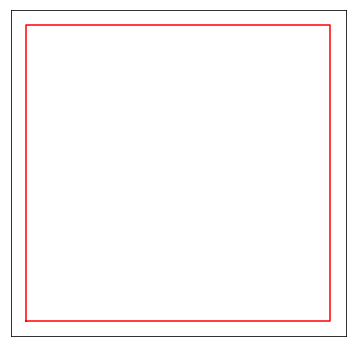

In [12]:
def dibuja_cuadrado(lado):
    "Función que dibuja un cuadrado usando 'geometría de tortuga'"
    t = TortugaConMemoria(color="red")
    for i in range(4):
        t.avanza(lado)
        t.izquierda(pi/2)
    t.plot()
    
dibuja_cuadrado(5)

In [13]:
def espiro(ángulo, máximo, lado=1, color="blue", infinito=20):
    """
    Gráfico de una 'curva epirolateral'
    Un patrón se repite "infinitas veces" (un número de veces sifuciente para cerrar la curva)
    """
    tortuga = TortugaConMemoria(color=color)
    for veces in range(infinito):
        contador = 1
        while contador <= máximo:
            tortuga.avanza(contador*lado)
            tortuga.derecha(ángulo)
            contador += 1
    tortuga.plot()

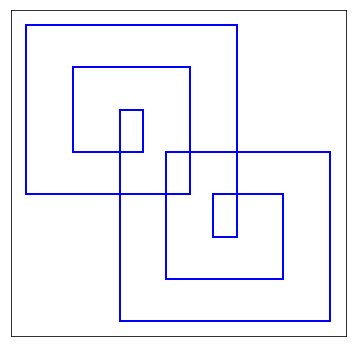

In [14]:
espiro(ángulo=pi/2, máximo=10)

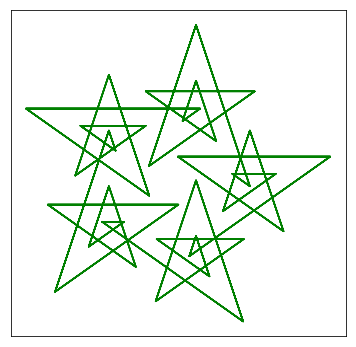

In [15]:
espiro(ángulo=4*pi/5, máximo=8, color="green")

In [16]:
def dibujar_lado_copo(tortuga, tamaño, nivel):
    if nivel==0:
        tortuga.avanza(tamaño)
    else:
        dibujar_lado_copo(tortuga, tamaño/3, nivel-1)
        tortuga.izquierda(pi/3)
        dibujar_lado_copo(tortuga, tamaño/3, nivel-1)
        tortuga.derecha(2*pi/3)
        dibujar_lado_copo(tortuga, tamaño/3, nivel-1)
        tortuga.izquierda(pi/3)
        dibujar_lado_copo(tortuga, tamaño/3, nivel-1)
        
def copo_nieve(nivel, color="cyan"):
    tortuga = TortugaConMemoria(color=color)
    tamaño=1
    for veces in range(3):
        dibujar_lado_copo(tortuga, tamaño, nivel)
        tortuga.derecha(2*pi/3)
    tortuga.plot(figsize=(9,9))

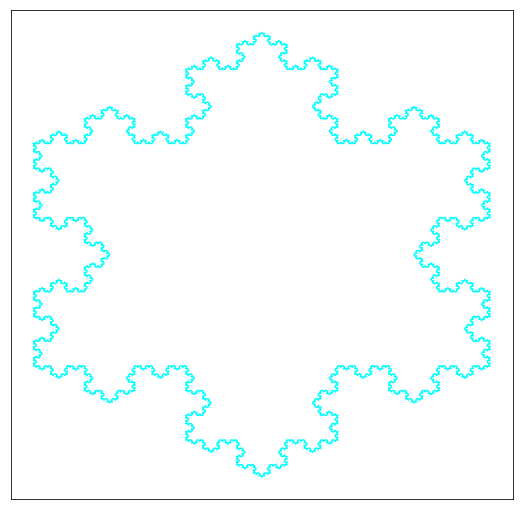

In [24]:
copo_nieve(nivel=5)

### Podemos usar `ipywidgets` para interaccionar con la tortuga 

---

**Atención**: esta sección debe ejecutarse en un *notebook* local, pues no es posible intereaccionar con los *widgets* de Ipython (deslizadores, selectores de valores, etc) a través de internet.

Para interaccionar con los *widgets*, se puede [descargar de internet](https://nbviewer.jupyter.org) el *notebook* (a un fichero ``.ipynb`` local) y luego abrirlo con *Jupyter*. También se pueden [descargar todos los *notebooks* desde Github](https://github.com/rrgalvan/IntroPythonMasterMatemat) (pulsar "Clone or download").

---

In [18]:
from ipywidgets import *

# Manejamos la función copo_nieve de forma interactiva
interact(copo_nieve, 
         nivel = (0,5), 
         color = ["orange","green","blue","cyan"] )


interactive(children=(IntSlider(value=2, description='nivel', max=5), Dropdown(description='color', index=3, o…

<function __main__.copo_nieve(nivel, color='cyan')>

### También usamos *widgets* para dibujar espirolaterales de forma interactiva

In [19]:
# Es más intuitivo si defino la espirolateral con ángulos dados en grados
def espiro_grados(grados, máximo, color):
    "Curva espirolateral en la que los ángulos se definen en grados"
    radianes = grados*pi/180
    espiro(ángulo=radianes, máximo=máximo, color=color)

interact(espiro_grados, 
         grados = BoundedIntText(description="Grados", min=0, max=360, value=170, step=5),
         máximo = BoundedIntText(description="Máximo", min=0,max=60, value=40),
         color  = ColorPicker(description='Escoge color', value='slateblue' ) )

interactive(children=(BoundedIntText(value=170, description='Grados', max=360, step=5), BoundedIntText(value=4…

<function __main__.espiro_grados(grados, máximo, color)>